# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

In [1]:
import os

network_path = os.path.join("networks","PD-example-2")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 100
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20220225")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")


rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Adding Striatum with 100 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3/mechanisms.json
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/dspn
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file

In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd0, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd0, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/125 (99 neurons)
Processing hyper voxel : 31/125 (99 neurons)
Processing hyper voxel : 32/125 (84 neurons)
Processing hyper voxel : 37/125 (72 neurons)
Processing hyper voxel : 56/125 (69 neurons)
Processing hyper voxel : 6/125 (56 neurons)
Processing hyper voxel : 30/125 (54 neurons)
Processing hyper voxel : 61/125 (53 neurons)
Processing hyper voxel : 11/125 (44 neurons)
Processing hyper voxel : 57/125 (36 neurons)
Processing hyper voxel : 35/125 (33 neurons)
Processing hyper voxel : 7/125 (26 neurons)
Processing hyper voxel : 62/125 (24 neurons)
Processing hyper voxel : 26/125 (22 neurons)
Processing hyper voxel : 12/125 (21 neurons)
Processing hyper voxel : 5/125 (17 neurons)
Processing hyper voxel : 55/125 (13 neurons)
Processing hyper voxel : 41/125 (11 neurons)
Processing h

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd0, rc=rc)
sp.prune()

Read 139149 out of total 139149 synapses


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_pd0, 
                 input_config_file=input_config,
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Loading 99 neurons with 6499 synapses and 0 gap junctions
Writing spikes to networks/PD-example-2/PD0/input-spikes.hdf5


## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [7]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 100 neurons
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3/parameters.json
Mechanism file not found: /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3/mechanisms.json
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/dspn
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file

In [8]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd2_ref, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2-ref/network-config.json


In [9]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd2_ref, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2-ref/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/125 (99 neurons)
Processing hyper voxel : 31/125 (99 neurons)
Processing hyper voxel : 32/125 (82 neurons)
Processing hyper voxel : 37/125 (68 neurons)
Processing hyper voxel : 56/125 (63 neurons)
Processing hyper voxel : 6/125 (54 neurons)
Processing hyper voxel : 30/125 (50 neurons)
Processing hyper voxel : 61/125 (50 neurons)
Processing hyper voxel : 11/125 (38 neurons)
Processing hyper voxel : 57/125 (33 neurons)
Processing hyper voxel : 35/125 (29 neurons)
Processing hyper voxel : 7/125 (24 neurons)
Processing hyper voxel : 26/125 (22 neurons)
Processing hyper voxel : 62/125 (21 neurons)
Processing hyper voxel : 12/125 (19 neurons)
Processing hyper voxel : 5/125 (15 neurons)
Processing hyper voxel : 55/125 (14 neurons)
Processing hyper voxel : 41/125 (11 neurons)
Processi

In [10]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd2_ref, rc=rc)
sp.prune()

Read 89217 out of total 89217 synapses


## Degenerating the PD0 network to get PD2 network

In [11]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file()
swap.close()

Loading 99 neurons with 6499 synapses and 0 gap junctions
Loading 99 neurons with 2965 synapses and 0 gap junctions
Writing new network to networks/PD-example-2/PD2/network-synapses.hdf5
Loading synapses into memory.
6499 / 6499
Processing neuron 0
No axon for neuron LTS_8 (14)
No axon for neuron ChIN_0 (88)
Synapse degeneration recovery...
Running post degeneration pruning of synapses
4347 / 4347
Unable to compensate for 180.6 degenerated synapses.
Post pruning. Keeping 3029/4347 (69.680%)
Keeping 3029 out of 6499 synapses (46.607 %)
Loading synapses into memory.
0 / 0
Keeping 0 out of 0 gap junctions (0.000 %)
Writing new input data to networks/PD-example-2/PD2/input-spikes.hdf5
Processed input to dSPN_28 (0), keeping 272 out of 400 inputs (68.00 %)
Processed input to dSPN_9 (1), keeping 65 out of 400 inputs (16.25 %)
Processed input to dSPN_17 (10), keeping 112 out of 400 inputs (28.00 %)
Processed input to iSPN_12 (11), keeping 220 out of 400 inputs (55.00 %)
Processed input to dSP

## Plotting of a degenerated neuron

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Loading 99 neurons with 6499 synapses and 0 gap junctions
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2/network-synapses.hdf5
Loading 99 neurons with 3029 synapses and 0 gap junctions
Plotting 400 external synapses
Plotting 169 external synapses
Figure written: networks/PD-example-2/PD2/figures/input-to-50-dSPN_13-and-internal-synapses.png


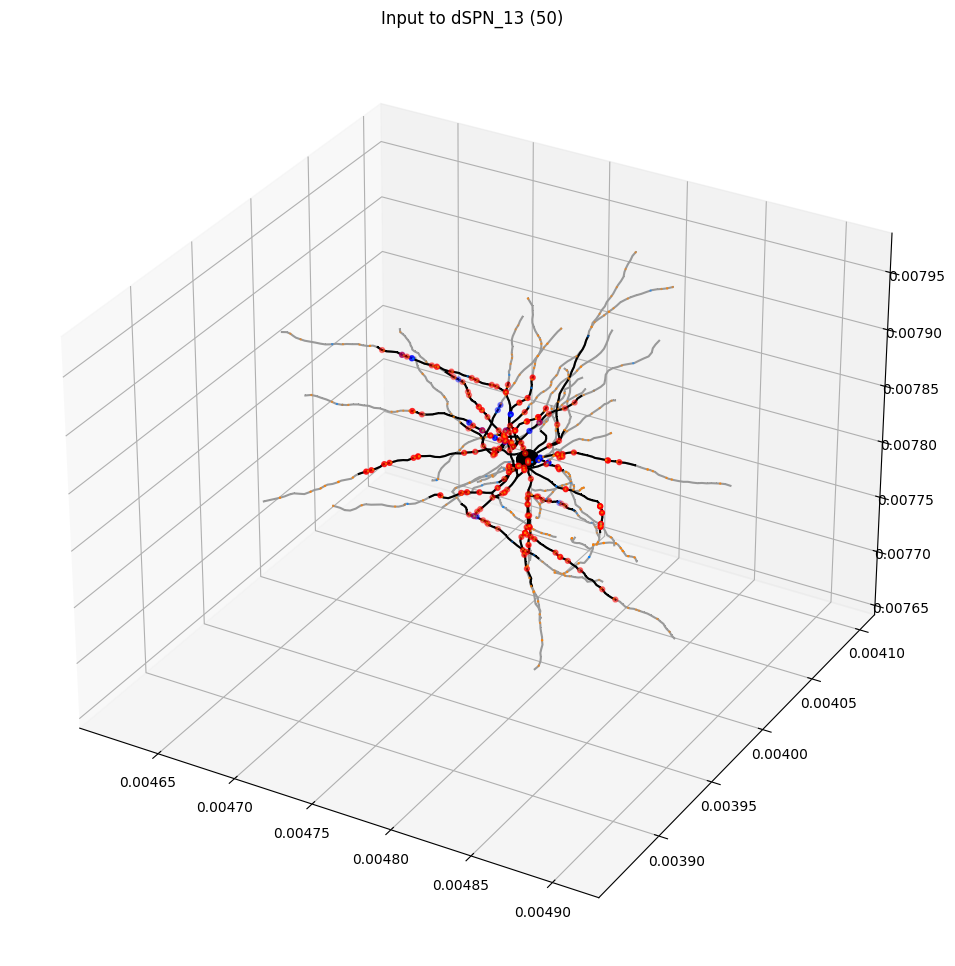

In [12]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)
plot_neuron_id = 50
pd.plot_neuron(neuron_id=plot_neuron_id, figure_size=(12,12), show_internal_synapses=True)